<h1><center>Laboratorio 4: Spark y EDA</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos - Primavera 2024</strong></center>

### Cuerpo Docente:

- Profesores: Ignacio Meza, Sebastián Tinoco
- Auxiliar: Eduardo Moya
- Ayudantes: Nicolás Ojeda, Melanie Peña, Valentina Rojas

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Cristopher Urbina H.
- Nombre de alumno 2: Joaquin Zamora


### **Link de repositorio de GitHub:** [Repositorio](https://github.com/CrisU8/MDS7202-Primavera2024) [Repositorio 2](https://github.com/ryuzak-can/MDS7202-P-2024)

## Reglas:

- **Grupos de 2 personas**
- Fecha de entrega: 6 días de plazo con descuento de 1 punto por día. Entregas Jueves a las 23:59.
- Instrucciones del lab el viernes a las 16:15 en formato online. Asistencia no es obligatoria.
- <u>Prohibidas las copias</u>. Cualquier intento de copia será debidamente penalizado con el reglamento de la escuela.
- Tienen que subir el laboratorio a u-cursos y a su repositorio de github. Labs que no estén en u-cursos no serán revisados. Recuerden que el repositorio también tiene nota.
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Pueden usar cualquier material del curso que estimen conveniente.

### Temas a tratar

- Introducción al manejo y análisis de grandes volúmenes de datos por medio de la libreria `pyspark`.

### Objetivos principales del laboratorio

- Entender, aplicar y aprovechar las ventajas que nos ofrece la libreria `pyspark` para manejar datos tabulares de gran volúmen.
- Crear gráficos para el desarrollo de Análisis de Datos Exploratorios (EDA).

### Datos del Lab

- Base de datos: https://gitlab.com/imezadelajara/datos_clase_7_mds7202/-/raw/main/datos_lab_spark.parquet
- Objeto serializado: https://gitlab.com/imezadelajara/datos_clase_7_mds7202/-/raw/main/object.pkl

## 1. Preguntas Teóricas [12 puntos]
(2 por pregunta)

<center>
<img src="https://img.buzzfeed.com/buzzfeed-static/static/2018-08/1/17/enhanced/buzzfeed-prod-web-05/anigif_enhanced-9173-1533160033-1.gif" width=350 />



Responda en  máximo 5 líneas las siguientes preguntas:
1. ¿Qué es Apache Spark y cuáles son sus principales ventajas sobre Pandas?
2. ¿Qué es un RDD en Spark? Describe una de sus principales características. ¿Qué tienen que ver con los dataframes?.
3. Diferencia entre transformaciones y acciones en Spark. Proporciona ejemplos de cada una. ¿Qué ocurre internamente cuando se ejecuta una acción?
4. Explica la importancia del particionamiento en Spark y cómo afecta el rendimiento del procesamiento de datos.
5. ¿Cuáles son las funciones de Spark Driver y Spark Executor?
6. ¿Qué es el Catalyst Optimizer en Apache Spark y cuál es su función principal en la optimización de consultas SQL?


**Respuestas**

> 1. Apache spark es un motor computacional para procesar grandes cantidades de datos mediante la computación distribuida haciendo uso de los principios de MapReduce. Siendo, esta última una gran ventaja sobre pandas al trabajar con Big Data.
> 2. Un Resilient Distributed Dataframe es un tipo de dataframe, es decir, permite almacenar datos de manera columnar, pero a diferencia de los bien conocidos dataframes de `Pandas`, estos ofrecen todas las ventajas del paralelismo que ofrece spark.
> 3. Spark tiene un sistema de "Activación desfasado", es decir, las transformaciones (join, group by, agregaciones, etc) empleadas en un dataframe no ocurren hasta que se realiza una acción sobre este (collect, display, show, count, etc). Cuando se ejecuta una acción, se crea el plan de ejecución, se ejecuta, se ejecutan las tareas en los nodos de cada cluster, finalmente se almacenan los resultados.
> 4. Para aprovechar adecuadamente las ventajas del paralelismo que ofrece spark, es importante ocupar particiones adecuadas, ya que un número pequeño de particiones puede llevar a problemas de eficiencia, sobrecargando al driver, además un número pequeño de particiones puede sobrecargar ciertos nodos dejando a otros inactivos, provocando ineficiencia en el procesamiento, y perdiendo dinero por los nodos que podrian usarse y no se usan.
> 5. Driver es el encargado distribuir las tareas hacia los Ejecutores, quienes valga la redundancia las ejecutan.
> 6. Es un framework que transforma y optimiza consultas y operaciones para ejecutarlas de manera eficiente.

## Parte Práctica



<center>
<img src="https://pbs.twimg.com/ad_img/1285681293590749189/kDckYy6Z?format=png&name=900x900" width=350 />

Juan Carlos Bodoque, el famoso periodista y empresario, decidió diversificar su portafolio de negocios y crear su propia plataforma de e-commerce. Después de varios años de investigar y analizar el mercado financiero, finalmente logró fundar Bodoque E-Shop con el objetivo de ofrecer a sus clientes una experiencia personalizada y confiable en sus transacciones.

Sin embargo, con la llegada de los aliens al planeta Tierra, aparecen nuevos desafíos para el negocio. Por ello, Bodoque decide invertir en un equipo de expertos en tecnología y comercio interplanetario, para que Bodoque Shop implemente las últimas innovaciones en servicio al cliente para garantizar la satisfacción y fidelización de sus nuevos clientes.

El primer objetivo de Bodoque E-Shop será la hacer un análisis exploratorio para entender mejor el comportamiento de los usuarios en la plataforma. Para ello Bodoque les hace entrega de un extenso dataset en el que se registran las actividades que han realizado sus clientes durante los últimos meses. A continuación se presenta un diccionario de variables que levanto el equipo de consultores interplanetarios de Bodoque:

1. `Transaction ID`: A unique identifier for each transaction.
2. `Customer ID`: A unique identifier for each customer.
3. `Transaction Amount`: The total amount of money exchanged in the transaction in USD.
4. `Transaction Date`: The date and time when the transaction took place.
5. `Payment Method`: The method used to complete the transaction (e.g., credit card, PayPal, etc.).
6. `Product Category`: The category of the product involved in the transaction.
7. `Quantity`: The number of products involved in the transaction.
8. `Customer Age`: The age of the customer making the transaction.
9. `Customer Location`: The geographical location of the customer.
10. `Device Used`: The type of device used to make the transaction (e.g., mobile, desktop).
11. `IP Address`: The IP address of the device used for the transaction.
Shipping Address: The address where the product was shipped.
12. `Billing Address`: The address associated with the payment method.
13. `Is An Alien`: A binary indicator of whether customer is an alien.
14. `Account Age Days`: The age of the customer's account in days at the time of the transaction.
15. `Transaction Hour`: The hour of the day when the transaction occurred.


### Importamos librerias utiles y cargamos los datos😸

In [47]:
#!pip install pyspark
#!apt-get install openjdk-8-jdk-headless -qq > /dev/null

import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
import warnings
warnings.filterwarnings('ignore')

In [48]:
# Libreria Core del lab.
import pyspark
from pyspark import SparkConf, SparkContext
from pyspark.sql import SparkSession
import pandas as pd
from pyspark.sql.types import StringType, IntegerType, FloatType


#Libreria para plotear
!pip install --upgrade plotly
!pip install missingno
import matplotlib.pyplot as plt
import plotly.express as px

Cargue los datos usando **pyspark**

> Nota: Puede ser util el siguiente [enlace](https://www.oracle.com/cl/java/technologies/downloads/#jdk22-windows)

In [49]:
# Configuración de Spark
spark = SparkSession.builder \
    .appName("LAB4") \
    .getOrCreate()

# Obtener el contexto de Spark a partir de la sesión existente
sc = spark.sparkContext

# Ajustar el nivel de logs
sc.setLogLevel("ERROR")
sc

<SparkContext master=local[*] appName=LAB4>

In [50]:
import requests

# URL del archivo Parquet
url = "https://gitlab.com/imezadelajara/datos_clase_7_mds7202/-/raw/main/datos_lab_spark.parquet"

# Descargar el archivo Parquet
response = requests.get(url)

# Guardar el archivo localmente
with open("./datos_lab_spark.parquet", "wb") as f:
    f.write(response.content)

print("Archivo descargado con éxito")

Archivo descargado con éxito


In [51]:
df = spark.read.parquet("datos_lab_spark.parquet")
df.show()

+--------------------+--------------------+------------------+-------------------+--------------+----------------+--------+------------+-----------------+-----------+---------------+--------------------+--------------------+-----------+----------------+----------------+
|      Transaction ID|         Customer ID|Transaction Amount|   Transaction Date|Payment Method|Product Category|Quantity|Customer Age|Customer Location|Device Used|     IP Address|    Shipping Address|     Billing Address|Is An Alien|Account Age Days|Transaction Hour|
+--------------------+--------------------+------------------+-------------------+--------------+----------------+--------+------------+-----------------+-----------+---------------+--------------------+--------------------+-----------+----------------+----------------+
|4b4a5fe1-ec4d-4f9...|d1b87f62-51b2-493...|             58.09|2022-03-24 00:00:00| bank transfer|     electronics|     1.0|        17.0|    Amandaborough|       NULL| 212.195.49.198|Unit 

### 2. Limpieza con pyspark [8 puntos]
(1 punto por pregunta)

<center>
<img src="https://miro.medium.com/v2/resize:fit:600/1*A6PpTrehGLxCJWNcUsDTNg.jpeg" width=350 />



Para comenzar con el análisis exploratorio usted decide empezar limpiando la base de datos con **pyspark** dado el alto volumen de datos que genera diariamente Bodoque E-Shop.

**Nota: NO SE PERMITE EL USO DE PANDAS EN ESTA SECCIÓN**



1.   Utilice `.printSchema()` para revisar la estructura de los datos
2.   Muestre las primeras 10 filas del dataset. Hint: utilice `.show()`
3.   Imprima un muestreo aleatorio con el 5% de los datos diponibles. . Hint: utilice `.sample()`
4. Revise los tipos de datos de cada columna con `.dtypes()` y responda la siguiente pregunta: ¿Cuál/es columna/s tiene/n un tipo de dato que no es el adecuado y por qué?
5. Cree una función **cast_columns** que permita cambiar el tipo de datos de las columnas problemáticas. Luego utilice esta función respecto a lo respondido en la pregunta anterior.
6. Cuente la cantidad de datos nulos por variable. Recuerde que Spark no posee un método que le permita calcular directamente los nulos.
7. Elimine datos nulos.
8. Elimine datos duplicados.


In [52]:
df.printSchema()

root
 |-- Transaction ID: string (nullable = true)
 |-- Customer ID: string (nullable = true)
 |-- Transaction Amount: double (nullable = true)
 |-- Transaction Date: timestamp_ntz (nullable = true)
 |-- Payment Method: string (nullable = true)
 |-- Product Category: string (nullable = true)
 |-- Quantity: double (nullable = true)
 |-- Customer Age: double (nullable = true)
 |-- Customer Location: string (nullable = true)
 |-- Device Used: string (nullable = true)
 |-- IP Address: string (nullable = true)
 |-- Shipping Address: string (nullable = true)
 |-- Billing Address: string (nullable = true)
 |-- Is An Alien: double (nullable = true)
 |-- Account Age Days: double (nullable = true)
 |-- Transaction Hour: double (nullable = true)



In [53]:
df.show(10)

+--------------------+--------------------+------------------+-------------------+--------------+----------------+--------+------------+-----------------+-----------+---------------+--------------------+--------------------+-----------+----------------+----------------+
|      Transaction ID|         Customer ID|Transaction Amount|   Transaction Date|Payment Method|Product Category|Quantity|Customer Age|Customer Location|Device Used|     IP Address|    Shipping Address|     Billing Address|Is An Alien|Account Age Days|Transaction Hour|
+--------------------+--------------------+------------------+-------------------+--------------+----------------+--------+------------+-----------------+-----------+---------------+--------------------+--------------------+-----------+----------------+----------------+
|4b4a5fe1-ec4d-4f9...|d1b87f62-51b2-493...|             58.09|2022-03-24 00:00:00| bank transfer|     electronics|     1.0|        17.0|    Amandaborough|       NULL| 212.195.49.198|Unit 

In [54]:
df_sample = df.sample(fraction=0.05, seed=26)
df_sample.show()

+--------------------+--------------------+------------------+-------------------+--------------+----------------+--------+------------+-------------------+-----------+---------------+--------------------+--------------------+-----------+----------------+----------------+
|      Transaction ID|         Customer ID|Transaction Amount|   Transaction Date|Payment Method|Product Category|Quantity|Customer Age|  Customer Location|Device Used|     IP Address|    Shipping Address|     Billing Address|Is An Alien|Account Age Days|Transaction Hour|
+--------------------+--------------------+------------------+-------------------+--------------+----------------+--------+------------+-------------------+-----------+---------------+--------------------+--------------------+-----------+----------------+----------------+
|4b4a5fe1-ec4d-4f9...|d1b87f62-51b2-493...|             58.09|2022-03-24 00:00:00| bank transfer|     electronics|     1.0|        17.0|      Amandaborough|       NULL| 212.195.49.1

In [55]:
df_sample.dtypes

[('Transaction ID', 'string'),
 ('Customer ID', 'string'),
 ('Transaction Amount', 'double'),
 ('Transaction Date', 'timestamp_ntz'),
 ('Payment Method', 'string'),
 ('Product Category', 'string'),
 ('Quantity', 'double'),
 ('Customer Age', 'double'),
 ('Customer Location', 'string'),
 ('Device Used', 'string'),
 ('IP Address', 'string'),
 ('Shipping Address', 'string'),
 ('Billing Address', 'string'),
 ('Is An Alien', 'double'),
 ('Account Age Days', 'double'),
 ('Transaction Hour', 'double')]

> Columnas como las de edades y cantidades, tendrian más sentido siendo enteras. Is an alien tambien tendria más sentido siendo un entero, la edad de la cuenta en días y la hora de transaccion tambien son valores que son enteros.

In [56]:
def cast_columns(df, cols_types):
    """
    Cambia el tipo de múltiples columnas en un DataFrame de Spark.

    Parámetros:
    - df: DataFrame de Spark.
    - cols_types: Diccionario con nombres de columnas como claves y tipos de datos de Spark como valores.

    Retorna:
    - DataFrame de Spark con tipos de columnas modificados.
    """
    for col_name, new_type in cols_types.items():
        df = df.withColumn(col_name, df[col_name].cast(new_type))
    return df

In [57]:
from pyspark.sql.types import StringType, IntegerType, FloatType

In [58]:
cols_to_cast = {"Quantity": IntegerType(), "Is An Alien": IntegerType(),
                "Customer Age":IntegerType(),
                "Account Age Days":IntegerType(),
                "Transaction Hour":IntegerType()}
df_con_casteo = cast_columns(df, cols_to_cast)
df_con_casteo.printSchema()

root
 |-- Transaction ID: string (nullable = true)
 |-- Customer ID: string (nullable = true)
 |-- Transaction Amount: double (nullable = true)
 |-- Transaction Date: timestamp_ntz (nullable = true)
 |-- Payment Method: string (nullable = true)
 |-- Product Category: string (nullable = true)
 |-- Quantity: integer (nullable = true)
 |-- Customer Age: integer (nullable = true)
 |-- Customer Location: string (nullable = true)
 |-- Device Used: string (nullable = true)
 |-- IP Address: string (nullable = true)
 |-- Shipping Address: string (nullable = true)
 |-- Billing Address: string (nullable = true)
 |-- Is An Alien: integer (nullable = true)
 |-- Account Age Days: integer (nullable = true)
 |-- Transaction Hour: integer (nullable = true)



In [59]:
from pyspark.sql.functions import col, sum


nulos = df.select([sum(col(c).isNull().cast("int")).alias(c) for c in df.columns])

nulos.show()

+--------------+-----------+------------------+----------------+--------------+----------------+--------+------------+-----------------+-----------+----------+----------------+---------------+-----------+----------------+----------------+
|Transaction ID|Customer ID|Transaction Amount|Transaction Date|Payment Method|Product Category|Quantity|Customer Age|Customer Location|Device Used|IP Address|Shipping Address|Billing Address|Is An Alien|Account Age Days|Transaction Hour|
+--------------+-----------+------------------+----------------+--------------+----------------+--------+------------+-----------------+-----------+----------+----------------+---------------+-----------+----------------+----------------+
|        126886|     126847|            126840|          126831|        126877|          126814|  126966|      126826|           126781|     126911|    126929|          126734|         126804|     126828|          126886|          126953|
+--------------+-----------+----------------

In [60]:
# Eliminacion de datos nulos
df = df.dropna()
df = df.dropDuplicates()
df.show()

+--------------------+--------------------+------------------+-------------------+--------------+----------------+--------+------------+-----------------+-----------+---------------+--------------------+--------------------+-----------+----------------+----------------+
|      Transaction ID|         Customer ID|Transaction Amount|   Transaction Date|Payment Method|Product Category|Quantity|Customer Age|Customer Location|Device Used|     IP Address|    Shipping Address|     Billing Address|Is An Alien|Account Age Days|Transaction Hour|
+--------------------+--------------------+------------------+-------------------+--------------+----------------+--------+------------+-----------------+-----------+---------------+--------------------+--------------------+-----------+----------------+----------------+
|48738ee5-2a9f-41a...|35940e8d-0d3a-49b...|            312.37|2021-03-17 00:00:00|    debit card|   home & garden|     2.0|        45.0|  Port Karenburgh|     tablet|  52.108.253.19|23601

### 3. Transformaciones con pyspark [6 puntos]
(1 punto por pregunta)

<center>
<img src="https://live.staticflickr.com/13/91801406_0e71d7f019_b.jpg" width=350 />



**Nota: NO SE PERMITE EL USO DE PANDAS EN ESTA SECCIÓN**

Para continuar con el análisis, los especistas de Bodoque les gustaría tener nuevas variables disponibles. Tras las notas de la reunión usted llega a la conclusión de que tiene que realizar las siguientes tareas (con el dataset preprocesado de la seccion anterior):


1.   Agregar una columna llamada "Transaction bp" con el **monto total** de la transacción en bodoque pesos. Se considera que $x$ dólares equivalen a $log(48+|x^{36}|)$ bodoque pesos.
2.   Crear una columna llamada "Transaction Month" con el mes en que se realiza una transacción.
3.   Crear la variable *Type of purchase* según la catidad de unidades vendidas de acuerdo a las siguientes categorías.
  * Compra minorista: 4 productos o menos.
  * Compra mayorista: 5 produtos o más.
4. Imprima los registros de compras hechas por alienígenas en el comecio mayorista.  Utilice `.filter()`.
5. Cuente la cantidad de compras realizadas por humanos y la cantidad de compras realizadas por alienígenas. Utilice `.groupby()`.
6. Muestre una tabla con la recaudación promedio por transacción para cada método de pago, tanto para humanos como alienígenas. Utilice `pivot()`.

In [61]:
from pyspark.sql.functions import log, abs, pow, month, when, avg, row_number, max

# 1. Agregar la columna "Transaction bp"
df = df.withColumn("Transaction bp", log(48 + abs(pow(col("Transaction Amount"), 36))))
# 2. Crear la columna "Transaction Month"
df = df.withColumn("Transaction Month", month(col("Transaction Date")))
# 3. Crear la columna "Type of purchase"
df = df.withColumn(
    "Type of purchase",
    when(col("Quantity") <= 4, "Compra minorista").otherwise("Compra mayorista")
)
df.show()

+--------------------+--------------------+------------------+-------------------+--------------+----------------+--------+------------+-----------------+-----------+---------------+--------------------+--------------------+-----------+----------------+----------------+------------------+-----------------+----------------+
|      Transaction ID|         Customer ID|Transaction Amount|   Transaction Date|Payment Method|Product Category|Quantity|Customer Age|Customer Location|Device Used|     IP Address|    Shipping Address|     Billing Address|Is An Alien|Account Age Days|Transaction Hour|    Transaction bp|Transaction Month|Type of purchase|
+--------------------+--------------------+------------------+-------------------+--------------+----------------+--------+------------+-----------------+-----------+---------------+--------------------+--------------------+-----------+----------------+----------------+------------------+-----------------+----------------+
|48738ee5-2a9f-41a...|359

In [62]:
# 4. Filtrar registros de compras hechas por alienígenas en el comercio mayorista
df_alien_mayorista = df.filter((col("Is An Alien") == 1) & (col("Type of purchase") == "Compra mayorista"))

df_alien_mayorista.show()

+--------------------+--------------------+------------------+-------------------+--------------+----------------+--------+------------+------------------+-----------+---------------+--------------------+--------------------+-----------+----------------+----------------+------------------+-----------------+----------------+
|      Transaction ID|         Customer ID|Transaction Amount|   Transaction Date|Payment Method|Product Category|Quantity|Customer Age| Customer Location|Device Used|     IP Address|    Shipping Address|     Billing Address|Is An Alien|Account Age Days|Transaction Hour|    Transaction bp|Transaction Month|Type of purchase|
+--------------------+--------------------+------------------+-------------------+--------------+----------------+--------+------------+------------------+-----------+---------------+--------------------+--------------------+-----------+----------------+----------------+------------------+-----------------+----------------+
|4e2ec27b-36e5-4d9...|

In [63]:
# 5. Contar la cantidad de compras por humanos y alienígenas
df.groupBy("Is An Alien").count().show()

+-----------+-----+
|Is An Alien|count|
+-----------+-----+
|        0.0|12700|
|        1.0|  688|
+-----------+-----+



In [64]:
# 6. Mostrar recaudación promedio por transacción para cada método de pago (humano vs alienígena)
df.groupBy("Is An Alien").pivot("Payment Method").agg(avg("Transaction Amount")).show()

+-----------+-----------------+------------------+-----------------+-----------------+
|Is An Alien|           PayPal|     bank transfer|      credit card|       debit card|
+-----------+-----------------+------------------+-----------------+-----------------+
|        0.0|215.1259858475394|215.15149230285914|206.3112232704404|215.2164188351921|
|        1.0|469.5177647058825| 547.6004624277458|517.7530538922156|547.1965168539328|
+-----------+-----------------+------------------+-----------------+-----------------+



### 4. EDA [20 puntos]
(1 punto por gráfico y 1 punto por su interpretación)

<center>
<img src="https://i.pinimg.com/originals/41/7e/7b/417e7b9089bcc20c4909df8954c6e742.gif" width=400 />



Esta sección tiene como objetivo evaluar su habilidad para generar reportes y conclusiones a partir de los patrones identificados en los datos proporcionados por Bodoque. Específicamente, se enfoca en **caracterizar las transacciones** y **explorar las diferencias y similitudes en el comportamiento de humanos y aliens**. Utilice el dataset que ya incluye las transformaciones necesarias.

Por favor, asegúrese de que **todas** las visualizaciones que realice cumplan con los siguientes criterios:
- Deben ser relevantes y fáciles de interpretar.
- Cada gráfico debe incluir un título claro, nombres en los ejes y leyendas adecuadas.
- Adjunte una breve descripción interpretativa junto a cada gráfico para explicar los resultados visualizados.

Para llevar a cabo esta tarea, siga los siguientes pasos utilizando la librería de visualización de su elección (matplotlib, seaborn, plotly, etc):

1. **Conversión del DataFrame a formato pandas** (2 puntos): Pase el DataFrame procesado a formato pandas. Evite realizar transformaciones adicionales con pandas.
2. **Visualización de Variables Categóricas** (2 puntos por visualización):
   - Genere **tres gráficos de barras** que diferencien entre humanos y aliens. Analice y comente cualquier diferencia o similitud observada entre estos dos grupos.
3. **Visualización de Variables Numéricas** (2 puntos por visualización):
   - Elabore **tres distplots** para examinar las distribuciones de variables numéricas, diferenciando entre humanos y aliens. Comente las diferencias o similitudes notables.
4. **Análisis de Patrones en Transacciones** (2 puntos por visualización):
   - Cree **tres gráficos avanzados** que ayuden a identificar patrones en las transacciones. Estos gráficos deben incorporar al menos dos dimensiones y diferir de los anteriores. Algunos ejemplos podrían ser un lineplot que muestre la cantidad de transacciones mensuales por canal de venta, o un barplot que exhiba los tres productos más vendidos por canal.

Estos pasos le permitirán no solo visualizar datos complejos de manera efectiva, sino también interpretar estos datos para extraer insights valiosos acerca del comportamiento de los consumidores en el contexto de Bodoque.

In [65]:
# 1. Convertir a pandas dataframe
df_pandas = df.sample(fraction=0.05, seed=26).toPandas()
df_pandas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 637 entries, 0 to 636
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Transaction ID      637 non-null    object        
 1   Customer ID         637 non-null    object        
 2   Transaction Amount  637 non-null    float64       
 3   Transaction Date    637 non-null    datetime64[ns]
 4   Payment Method      637 non-null    object        
 5   Product Category    637 non-null    object        
 6   Quantity            637 non-null    float64       
 7   Customer Age        637 non-null    float64       
 8   Customer Location   637 non-null    object        
 9   Device Used         637 non-null    object        
 10  IP Address          637 non-null    object        
 11  Shipping Address    637 non-null    object        
 12  Billing Address     637 non-null    object        
 13  Is An Alien         637 non-null    float64       

In [66]:
if not os.path.exists('./figuras'):
    os.makedirs('./figuras')

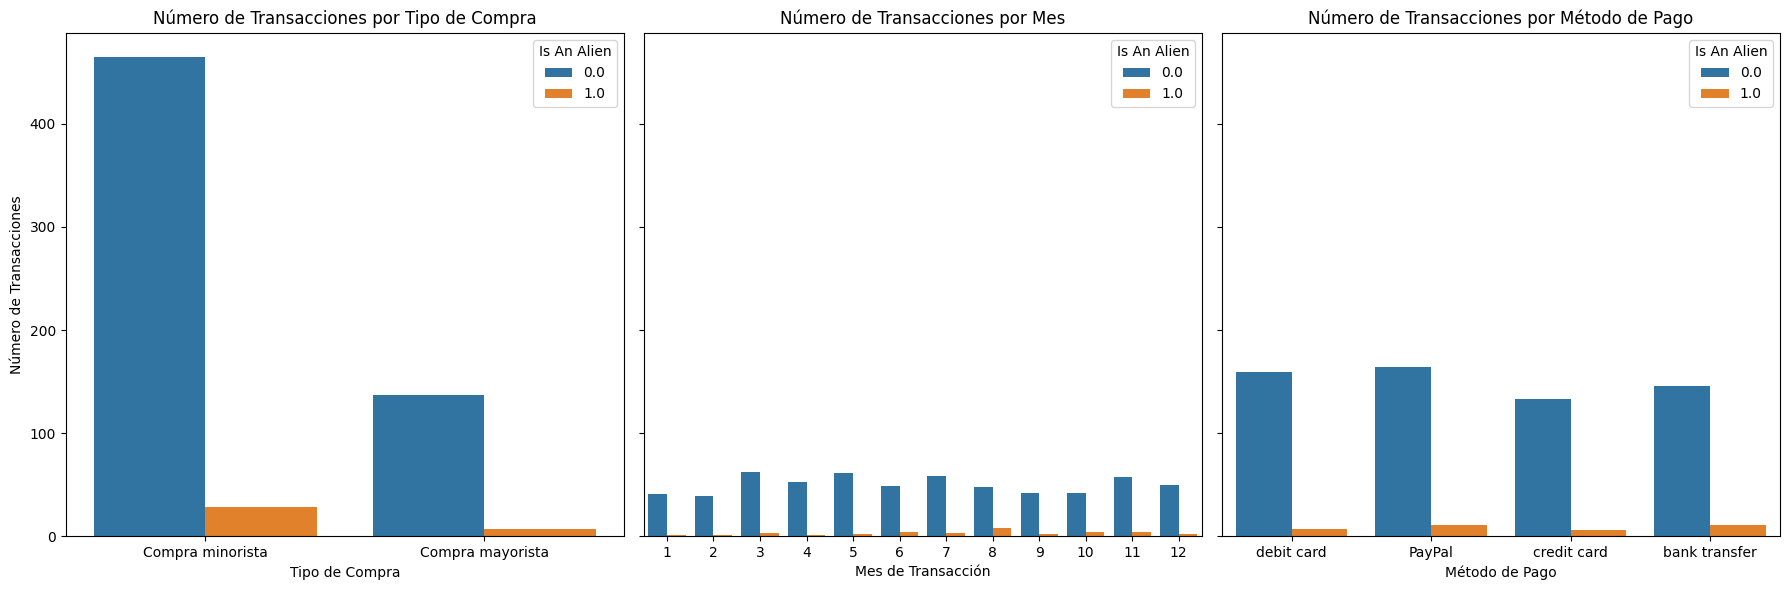

In [67]:
import seaborn as sns
# Crear la figura y los ejes para los gráficos
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Gráfico 1: Número de transacciones por tipo de compra
sns.countplot(data=df_pandas, x="Type of purchase", hue="Is An Alien", ax=axes[0])
axes[0].set_title("Número de Transacciones por Tipo de Compra")
axes[0].set_xlabel("Tipo de Compra")
axes[0].set_ylabel("Número de Transacciones")

# Gráfico 2: Número de transacciones por mes
sns.countplot(data=df_pandas, x="Transaction Month", hue="Is An Alien", ax=axes[1])
axes[1].set_title("Número de Transacciones por Mes")
axes[1].set_xlabel("Mes de Transacción")
axes[1].set_ylabel("Número de Transacciones")

# Gráfico 3: Número de transacciones por método de pago
sns.countplot(data=df_pandas, x="Payment Method", hue="Is An Alien", ax=axes[2])
axes[2].set_title("Número de Transacciones por Método de Pago")
axes[2].set_xlabel("Método de Pago")
axes[2].set_ylabel("Número de Transacciones")

# Ajustar el layout y mostrar la figura
plt.tight_layout()
plt.savefig("./figuras/Grafico1.png")
plt.show()


> Los Aliens son claramento muchos menos que los humanos. Sin embargo, ambos parecieran comportarse de la misma forma en cada uno de los gráficos. Luego, pareciera ser que para los humanos el mes con más transacciones es diciembre pero para los aliens es agosto (Cosas de aliens).

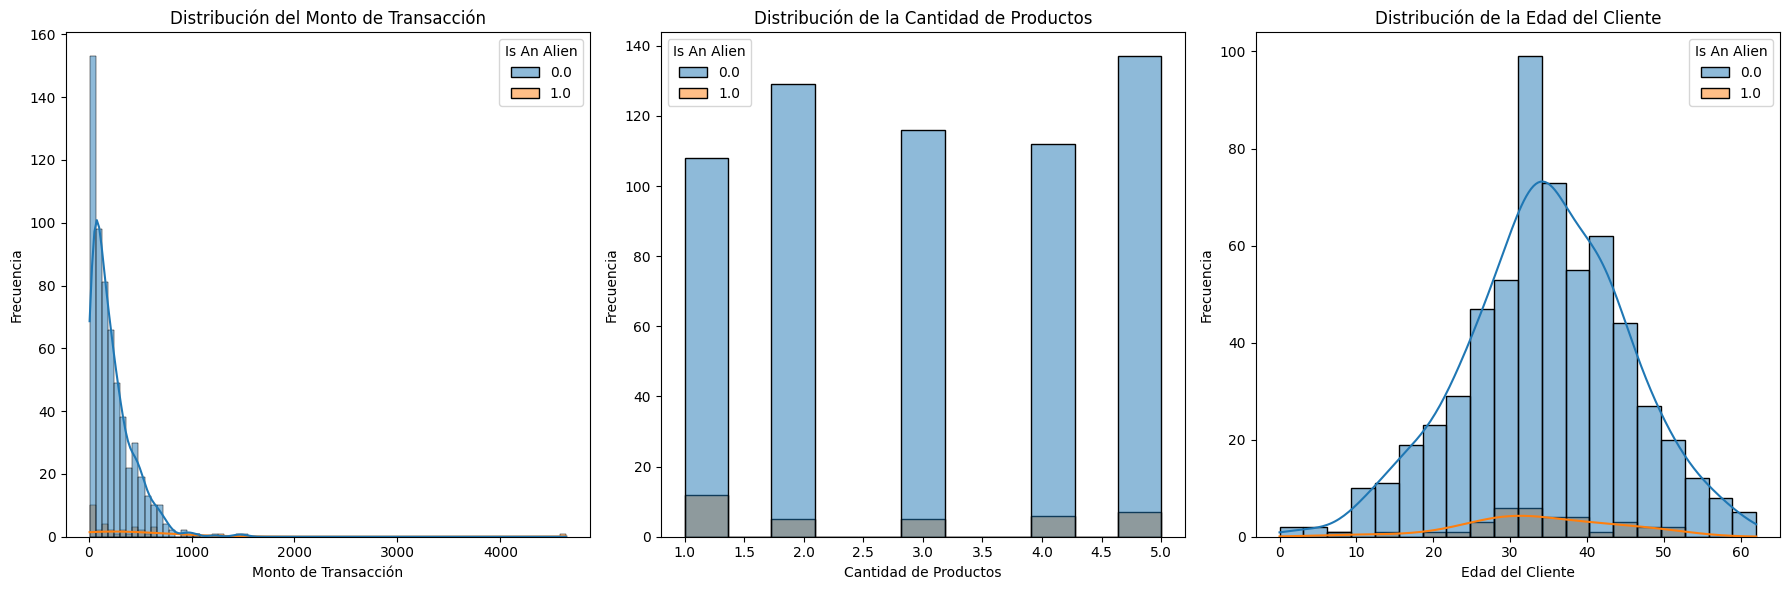

In [68]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=False)

# Gráfico 1: Distribución del Monto de Transacción
sns.histplot(data=df_pandas, x="Transaction Amount", hue="Is An Alien", kde=True, ax=axes[0])
axes[0].set_title("Distribución del Monto de Transacción")
axes[0].set_xlabel("Monto de Transacción")
axes[0].set_ylabel("Frecuencia")

# Gráfico 2: Distribución de la Cantidad de Productos
sns.histplot(data=df_pandas, x="Quantity", hue="Is An Alien", kde=False, ax=axes[1])
axes[1].set_title("Distribución de la Cantidad de Productos")
axes[1].set_xlabel("Cantidad de Productos")
axes[1].set_ylabel("Frecuencia")

# Gráfico 3: Distribución de la Edad del Cliente
sns.histplot(data=df_pandas, x="Customer Age", hue="Is An Alien", kde=True, ax=axes[2])
axes[2].set_title("Distribución de la Edad del Cliente")
axes[2].set_xlabel("Edad del Cliente")
axes[2].set_ylabel("Frecuencia")

# Ajustar el layout
plt.tight_layout()
plt.savefig("./figuras/Grafico2")

# Mostrar la figura
plt.show()


> El comportamiento en las variables númericas tambien es practicamente identico.

### 5. Particiones y consultas en SQL [2 puntos]

<center>
<img src="https://gitlab.com/imezadelajara/datos_clase_7_mds7202/-/raw/main/misc_images/1696330143457.gif" width=400 />

El equipo de Bodoque e-shop ha solicitado que los datos estén disponibles en una tabla SQL consultable. Además, están interesados en aprovechar las funciones de ventana en SQL para análisis avanzados. Las funciones de ventana permiten realizar cálculos sobre un conjunto de filas que están relacionadas con la fila actual. Por ejemplo, UNBOUNDED PRECEDING se usa para indicar que el rango de la función de ventana comienza desde la primera fila de la partición o del conjunto de resultados, lo cual es útil para calcular sumas acumulativas hasta la fila actual. Las variaciones comunes de este uso incluyen:

- `UNBOUNDED PRECEDING` to `CURRENT ROW`: Calcula desde el inicio de la partición hasta la fila actual.
- `UNBOUNDED PRECEDING` to `UNBOUNDED FOLLOWING`: Cubre todas las filas dentro de la partición.
- `VALUE PRECEDING` to `VALUE FOLLOWING`: Establece un rango específico basado en valores antes y después de la fila actual.

<center>
<img src="https://learnsql.com/blog/sql-window-functions-rows-clause/1.png" width=500 />

Ejemplo de uso en SQL:

```sql
STAT(COL1_NAME) OVER (PARTITION BY COL2_NAME ORDER BY COL3_NAME ROWS BETWEEN X PRECEDING AND CURRENT ROW)
```


Responda y realice los siguientes puntos:

1. **Creación de Tabla con PySpark** (2 puntos):
   - Desarrolle un script utilizando PySpark para crear una tabla a partir de un DataFrame previamente transformado. Seleccione y utilice una variable específica para la partición de la tabla. Justifique su elección de esta variable considerando factores como el tamaño del DataFrame, la distribución de los datos y el impacto potencial en el rendimiento de futuras consultas.

2. **Consulta SQL para Principales Clientes** (Bonus: 2 punto):
   - Ejecute una consulta SQL para identificar los 10 clientes que más productos han comprado. La consulta debe retornar el ID del cliente junto con el total de productos comprados, ordenados en forma descendente.

3. **Implementación de Función de Ventana en SQL y Equivalente en Spark** (Bonus: 2 punto):
   - Implemente una función de ventana en SQL para calcular la compra más alta realizada por cada usuario en los últimos tres meses. Además, describa cómo se podría realizar una función equivalente en Spark, considerando las capacidades específicas de PySpark para manejar este tipo de consultas.



In [69]:
df.write \
    .format("parquet") \
    .mode("overwrite") \
    .partitionBy("Transaction Month") \
    .saveAsTable("tabla_transaccional")

> Se decide particionar por mes ya que esta es una columna con no tan alta cardinalidad, por lo que no se generan demasiados archivos, evitando así el problema de archivos pequeños. Luego, esta columna es muy útil para filtrar consultas a menudo, por lo que al estar la tabla particionada por mes, mejorara notablemente el perfomance de las consultas.

In [70]:
consulta = """
SELeCT count(distinct `Customer ID`)
FROM `tabla_transaccional`
"""
spark.sql(consulta).show()

+---------------------------+
|count(DISTINCT Customer ID)|
+---------------------------+
|                      13388|
+---------------------------+



In [71]:
consulta = """
SELECT
    `Customer ID`,
    `Quantity`
FROM
    tabla_transaccional
ORDER BY
    `Quantity` DESC
LIMIT 10;

"""
spark.sql(consulta).show()

+--------------------+--------+
|         Customer ID|Quantity|
+--------------------+--------+
|7a8f0026-b2d0-4ab...|     5.0|
|627ed7d4-90ad-4f6...|     5.0|
|bdba9bd0-8af7-434...|     5.0|
|8e5c95a4-8712-48c...|     5.0|
|18bbd636-9f6c-4da...|     5.0|
|72631f6b-36a0-4cc...|     5.0|
|23f0db27-28e4-426...|     5.0|
|b38369a8-a13b-42a...|     5.0|
|2d6fa082-d26f-409...|     5.0|
|60dbef0f-2405-449...|     5.0|
+--------------------+--------+



In [72]:
consulta = """
WITH RankedPurchases AS (
    SELECT
        `Customer ID`,
        `Transaction Amount`,
        `Transaction Date`,
        ROW_NUMBER() OVER (PARTITION BY `Customer ID` ORDER BY `Transaction Date` DESC, `Transaction Amount` DESC) AS rank
    FROM
        tabla_transaccional
    WHERE
        `Transaction Date` >= DATEADD(month, -3, CURRENT_DATE)
)
SELECT
    `Customer ID`,
    MAX(`Transaction Amount`) AS highest_purchase
FROM
    RankedPurchases
WHERE
    rank = 1
GROUP BY
    `Customer ID`
ORDER BY highest_purchase desc ;

"""

spark.sql(consulta).show()

+--------------------+------------------+
|         Customer ID|  highest_purchase|
+--------------------+------------------+
|c8432541-5eba-4dc...|3327.2000000000003|
|c97435c5-5cd1-499...|           3006.95|
|47cd15f5-e5cf-41c...|           2073.48|
|dd40a7d5-9553-400...|            1495.3|
|bdcabacc-2660-4c4...|           1451.15|
|88415f74-cd66-499...|           1363.14|
|9b5226fd-ef4b-4db...|           1300.35|
|f9fd5d53-7152-41c...|           1272.78|
|62910de2-5e3b-4e0...|           1221.84|
|69aef4a5-3e8b-414...|           1140.91|
|1db5079f-a7b2-4d1...|           1118.58|
|7948c2e5-9b87-4ee...|           1094.75|
|6453c98a-f96b-4d4...|           1037.17|
|283685e4-2f45-4fe...|           1012.45|
|9f709b9c-61b2-4a0...|            958.82|
|14e7d59d-a0a6-4d2...|            908.88|
|e45b0cb4-afa0-450...|            889.01|
|2c0d52af-aca9-473...|            884.09|
|08a92e83-101e-458...|            880.51|
|f8529dce-d6e9-454...|            867.56|
+--------------------+------------

In [73]:
from pyspark.sql import Window
from pyspark.sql import functions as F

# Crear la ventana para particionar por cliente y ordenar por fecha y monto de transacción
window_spec = Window.partitionBy("Customer ID").orderBy(col("Transaction Date").desc(), col("Transaction Amount").desc())

# Agregar la columna de rank
ranked_df = df.withColumn("rank", row_number().over(window_spec))

# Filtrar por rank = 1 y calcular la compra más alta
highest_purchase_df = ranked_df.filter(col("rank") == 1) \
    .groupBy("Customer ID") \
    .agg(max("Transaction Amount").alias("highest_purchase"))\
    .sort(F.desc("highest_purchase"))

highest_purchase_df.show()

+--------------------+------------------+
|         Customer ID|  highest_purchase|
+--------------------+------------------+
|5d6dfdc2-9f91-4ba...|           4638.55|
|6b4add5d-348d-44e...|           3674.75|
|607c4062-4909-4be...|            3653.2|
|c9496b42-e939-46f...|3589.2000000000003|
|76a6d9aa-9c66-49e...|           3573.15|
|58a55800-011c-43c...|3492.0499999999997|
|c8432541-5eba-4dc...|3327.2000000000003|
|cfc7d030-6d28-49a...|3264.0499999999997|
|1758f4b6-dc9f-4bc...|           3203.05|
|3cbfc6d5-7e57-4ad...|           3160.65|
|07b408ae-d9e2-4b1...|3154.8500000000004|
|4232812d-8afa-4b3...|           3048.35|
|c97435c5-5cd1-499...|           3006.95|
|932ab159-9d49-417...|2834.2000000000003|
|7a9a2c02-b1b8-4d5...|            2787.4|
|884b556f-aa80-4c6...|2757.7999999999997|
|97139cbb-8448-401...|           2671.75|
|d56792e9-73db-41b...|            2653.2|
|c775f38a-94ca-405...|            2613.7|
|aca62d0d-3f92-4ef...|2609.5499999999997|
+--------------------+------------

### 6. UDF [12 puntos]

<center>
<img src="https://64.media.tumblr.com/ba8c705edd2bed0a28d9458811155d69/tumblr_pap19zg4ae1w3zg6go1_400.gifv" width=400 />



Un experto en predicciones y programación le ha proporcionado un objeto serializado (`pickle`) diseñado para calcular las probabilidades de que un cliente cometa o no un fraude. Este experto sugiere que, para maximizar las capacidades de procesamiento distribuido de Spark, debería implementar `Scalar User Defined Functions` (udf). Esto le permitirá aplicar el objeto serializado en un entorno distribuido a lo largo de toda la población de datos. Un aspecto clave de la función desarrollada por el experto es que se enfoca exclusivamente en las siguientes columnas para realizar las predicciones: `['Transaction Amount', 'Quantity', 'Customer Age', 'Transaction Hour']`.

Aparte, el experto le proporciona las siguientes instrucciones para usar las UDF en Spark:

```python
from pyspark.sql.functions import udf
from pyspark.sql.types import FloatType

def custom_function(col1, col2, col3, col4):
    pass

udf_function = udf(custom_function, FloatType())
```

Basándose en la estructura proporcionada, debe desarrollar una función que ejecute un código específico. Tenga en cuenta que esta función solo puede recibir columnas de Spark y debe retornar el valor deseado. Posteriormente, deberá utilizar esta función UDF indicando la función personalizada y el formato de salida.

Siga los siguientes pasos para implementar la solución y responda las preguntas:

1. **Cargar el objeto serializado**: Revise el tipo de objeto y deduzca su función. (1 punto)
2. **Explorar el objeto**: Utilice las funciones `dir` y `help` para identificar qué método del objeto predice la probabilidad. (1 punto)
3. **Crear una función personalizada**: Elabore una función que prediga la probabilidad de fraude utilizando el último valor de la lista generada por el objeto serializado. Puede modificar el nombre de la función para reflejar su propósito. (6 puntos)
4. **Definir la función UDF**: Establezca la función UDF con la función personalizada que ha creado. (2 punto)
5. **Generar una nueva columna**: Añada una nueva columna `prediction` a su DataFrame en Spark utilizando la función UDF y muestre un ejemplo de cómo se aplica. ¿Qué beneficios podría generar utilizar udf? (2 puntos)

In [74]:
import pickle
import urllib.request

# Descargar el archivo pickle
url = "https://gitlab.com/imezadelajara/datos_clase_7_mds7202/-/raw/main/object.pkl"
local_file = "object.pkl"

urllib.request.urlretrieve(url, local_file)

# Cargar el objeto serializado
with open(local_file, "rb") as file:
    model = pickle.load(file)

# Verificar el tipo de objeto
print(type(model))


<class 'sklearn.linear_model._logistic.LogisticRegression'>


In [75]:
def predict_fraud(amount, quantity, age, hour):
    features = [[amount, quantity, age, hour]]
    prediction_probabilities = model.predict_proba(features)
    return float(prediction_probabilities[0][1])  # Índice 1 para la probabilidad de fraude


In [76]:
from pyspark.sql.functions import udf

# Definir la función UDF
udf_predict_fraud = udf(predict_fraud, FloatType())

In [77]:
# Añadir la columna de predicción
df = df.withColumn("prediction", udf_predict_fraud(
    col("Transaction Amount"),
    col("Quantity"),
    col("Customer Age"),
    col("Transaction Hour")
))

df.select("Transaction Amount", "Quantity", "Customer Age", "Transaction Hour", "prediction").show()


+------------------+--------+------------+----------------+-----------+
|Transaction Amount|Quantity|Customer Age|Transaction Hour| prediction|
+------------------+--------+------------+----------------+-----------+
|            312.37|     2.0|        45.0|             4.0| 0.07637426|
|             15.32|     1.0|        46.0|             7.0| 0.03141727|
|             30.87|     2.0|        43.0|             9.0| 0.02788114|
|            221.47|     3.0|        29.0|            22.0|0.016259737|
|             21.92|     1.0|        38.0|             2.0|  0.0464458|
|            217.25|     1.0|        54.0|            22.0|  0.0161297|
|            327.76|     2.0|        26.0|             6.0| 0.06901875|
|            346.35|     4.0|        31.0|             0.0| 0.10823988|
|             17.18|     5.0|        55.0|            16.0|0.015488073|
|             175.0|     3.0|        28.0|            17.0|0.021327687|
|            755.63|     5.0|        48.0|             7.0| 0.15

¿Qué beneficios podría generar utilizar udf?

**Respuesta**

> 6. Las UDFs permiten a Spark ser una plataforma con mayor versatilidad, ya que brindan la posibilidad de explorar más allá de la lógica de las funciones integradas del framework, es decir, propicia la libertad del usuario en el sentido que puede plantear su propia lógica personalizada.